In [1]:
import numpy as np
import pickle
np.random.seed(7)  # for reproducibility


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


Using TensorFlow backend.


In [3]:
import keras
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

In [4]:
import matplotlib.pyplot as plt
import os
import numpy

In [5]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict=pickle.load(fo, encoding='bytes')
    data=dict['data']
    data = data.reshape((-1, 32, 32, 3))
    labels=dict['label']
    return data, labels

In [6]:
def saveTest(your_predict_labels):
    f=open('testlabel.pickle','rb')
    labels=pickle.load(f)
    f.close()
  #here you must replace the labels that you have predicted for the test set:
    for i in range(len(labels)):
        labels[i]=your_predict_labels[i]
  #save the pickle file that you should upload:
    f=open('testlabel.pickle','wb')
    pickle.dump(labels,f)
    f.close()

In [8]:
X_train_label, Y_train_label =unpickle("trainset.pickle")
print(X_train_label.shape)

(9000, 32, 32, 3)


In [9]:
X_validation_label, Y_validation_label=unpickle("validset.pickle")

In [10]:
f=open('testset.pickle','rb')
dict=pickle.load(f)
f.close()
X_test_label=dict['data']
X_test_label = X_test_label.reshape((-1, 32, 32, 3))
X_test = X_test_label.astype('float32')

print(X_test_label.shape)

(3000, 32, 32, 3)


In [11]:
f=open('testlabel.pickle','rb')
Y_test_label=pickle.load(f)
f.close()
Y_test=np_utils.to_categorical(Y_test_label, 10)


In [12]:
X_train = X_train_label.astype('float32')
X_validation = X_validation_label.astype('float32')


Y_train = np_utils.to_categorical(Y_train_label, 10)
Y_validation = np_utils.to_categorical(Y_validation_label, 10)
print(X_train.shape)

(9000, 32, 32, 3)


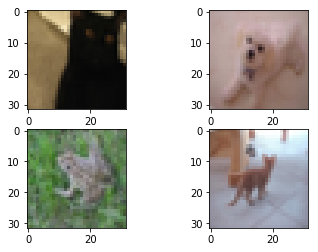

In [13]:
#image visualization
for i in range(4):
    img=X_train_label[i]
    img=img.reshape(-1,32,32).transpose([1,2,0])
    plt.subplot(2,2,i+1)
    plt.imshow(img)


In [14]:
# Parameter
num_classes = Y_train.shape[1]
batch_size = 64
epochs = 100
no_estimators = 5

In [15]:
# create CNN 6 conv layer & 2 Maxpooling layer
def create_cnn_model():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same'))
    model.add(BatchNormalization())    
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
    
    model.add(BatchNormalization())
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))

    model.add(BatchNormalization())
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 12s - loss: 15.0226 - acc: 0.4973 - val_loss: 4.9913 - val_acc: 0.5583
Epoch 2/100
 - 4s - loss: 2.9429 - acc: 0.5812 - val_loss: 1.8158 - val_acc: 0.5943
Epoch 3/100
 - 4s - loss: 1.6548 - acc: 0.6002 - val_loss: 1.4858 - val_acc: 0.5993
Epoch 4/100
 - 4s - loss: 1.3988 - acc: 0.6201 - val_loss: 1.3169 - val_acc: 0.6110
Epoch 5/100
 - 4s - loss: 1.2809 - acc: 0.6374 - val_loss: 1.2536 - val_acc: 0.5973
Epoch 6/100
 - 4s - loss: 1.2352 - acc: 0.6596 - val_loss: 1.2852 - val_acc: 0.6060
Epoch 7/100
 - 4s - loss: 1.1905 - acc: 0.6651 - val_loss: 1.1909 - val_acc: 0.6423
Epoch 8/100
 - 4s - loss: 1.1707 - acc: 0.6738 - val_loss: 1.1337 - val_acc: 0.6550
Epoch 9/100
 - 4s - loss: 1.1577 - acc: 0.6847 - val_loss: 1.2364 - val_acc: 0.6577
Epoch 10/100
 - 4s - loss: 1.1787 - acc: 0.6902 - val_loss: 1.4143 - val_acc: 0.6220
Epoch 11/100
 - 4s - loss: 1.1555 - acc: 0.7090 - val_loss: 1.3275 - val_acc: 0.6350
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.2483 - acc: 0.9730 - val_loss: 1.4482 - val_acc: 0.7173
Epoch 98/100
 - 4s - loss: 0.2564 - acc: 0.9720 - val_loss: 1.4105 - val_acc: 0.7260
Epoch 99/100
 - 4s - loss: 0.2352 - acc: 0.9749 - val_loss: 1.3235 - val_acc: 0.7233
Epoch 100/100
 - 4s - loss: 0.2383 - acc: 0.9753 - val_loss: 1.4020 - val_acc: 0.7143
3000/3000 [==============================] - 0s 164us/step

Test Accuracy: 0.7477


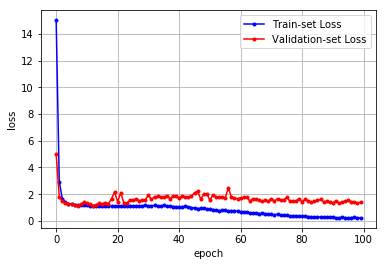

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 13s - loss: 15.4774 - acc: 0.4790 - val_loss: 5.1902 - val_acc: 0.5793
Epoch 2/100
 - 4s - loss: 3.0720 - acc: 0.5793 - val_loss: 2.1149 - val_acc: 0.5493
Epoch 3/100
 - 4s - loss: 1.6891 - acc: 0.5871 - val_loss: 1.6891 - val_acc: 0.5163
Epoch 4/100
 - 4s - loss: 1.3708 - acc: 0.6213 - val_loss: 1.4177 - val_acc: 0.5733
Epoch 5/100
 - 4s - loss: 1.3199 - acc: 0.6338 - val_loss: 1.3661 - val_acc: 0.6113
Epoch 6/100
 - 4s - loss: 1.2596 - acc: 0.6567 - val_loss: 1.2152 - val_acc: 0.6433
Epoch 7/100
 - 4s - loss: 1.1853 - acc: 0.6726 - val_loss: 1.1577 - val_acc: 0.6500
Epoch 8/100
 - 4s - loss: 1.1532 - acc: 0.6769 - val_loss: 1.2676 - val_acc: 0.6013
Epoch 9/100
 - 4s - loss: 1.1472 - acc: 0.6826 - val_loss: 1.2273 - val_acc: 0.6360
Epoch 10/100
 - 4s - loss: 1.1206 - acc: 0.6944 - val_loss: 1.5793 - val_acc: 0.5693
Epoch 11/100
 - 4s - loss: 1.1473 - acc: 0.7104 - val_loss: 1.2779 - val_acc: 0.6507
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.2323 - acc: 0.9734 - val_loss: 1.7427 - val_acc: 0.6710
Epoch 98/100
 - 4s - loss: 0.2184 - acc: 0.9758 - val_loss: 1.5110 - val_acc: 0.7147
Epoch 99/100
 - 4s - loss: 0.2363 - acc: 0.9732 - val_loss: 1.6349 - val_acc: 0.6997
Epoch 100/100
 - 4s - loss: 0.2220 - acc: 0.9728 - val_loss: 1.6818 - val_acc: 0.6853
3000/3000 [==============================] - 0s 164us/step

Test Accuracy: 0.7340


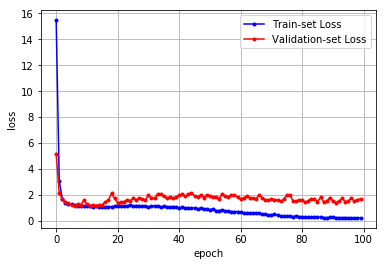

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 13s - loss: 14.7544 - acc: 0.4887 - val_loss: 4.9699 - val_acc: 0.5303
Epoch 2/100
 - 4s - loss: 2.9088 - acc: 0.5743 - val_loss: 1.8212 - val_acc: 0.5700
Epoch 3/100
 - 4s - loss: 1.6804 - acc: 0.5920 - val_loss: 1.4642 - val_acc: 0.6000
Epoch 4/100
 - 4s - loss: 1.3948 - acc: 0.6257 - val_loss: 1.3328 - val_acc: 0.6083
Epoch 5/100
 - 4s - loss: 1.3298 - acc: 0.6339 - val_loss: 1.2483 - val_acc: 0.6280
Epoch 6/100
 - 4s - loss: 1.2364 - acc: 0.6490 - val_loss: 1.2217 - val_acc: 0.6207
Epoch 7/100
 - 4s - loss: 1.1895 - acc: 0.6613 - val_loss: 1.3030 - val_acc: 0.5973
Epoch 8/100
 - 4s - loss: 1.1759 - acc: 0.6759 - val_loss: 1.1856 - val_acc: 0.6630
Epoch 9/100
 - 4s - loss: 1.1690 - acc: 0.6872 - val_loss: 1.1693 - val_acc: 0.6647
Epoch 10/100
 - 4s - loss: 1.1527 - acc: 0.6940 - val_loss: 1.1654 - val_acc: 0.6567
Epoch 11/100
 - 4s - loss: 1.1154 - acc: 0.7158 - val_loss: 1.1948 - val_acc: 0.6650
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.2152 - acc: 0.9767 - val_loss: 1.3806 - val_acc: 0.7210
Epoch 98/100
 - 4s - loss: 0.2440 - acc: 0.9703 - val_loss: 1.6986 - val_acc: 0.7127
Epoch 99/100
 - 4s - loss: 0.2181 - acc: 0.9718 - val_loss: 1.3873 - val_acc: 0.7203
Epoch 100/100
 - 4s - loss: 0.2131 - acc: 0.9759 - val_loss: 1.8549 - val_acc: 0.6783
3000/3000 [==============================] - 1s 169us/step

Test Accuracy: 0.7187


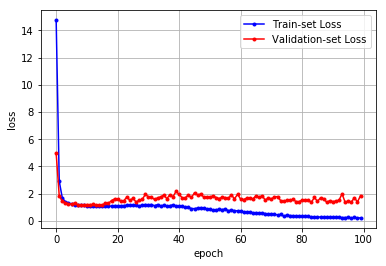

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 13s - loss: 13.9992 - acc: 0.4767 - val_loss: 4.3150 - val_acc: 0.5657
Epoch 2/100
 - 4s - loss: 2.7311 - acc: 0.5581 - val_loss: 1.8436 - val_acc: 0.5630
Epoch 3/100
 - 4s - loss: 1.5926 - acc: 0.5926 - val_loss: 1.3591 - val_acc: 0.6083
Epoch 4/100
 - 4s - loss: 1.3987 - acc: 0.6171 - val_loss: 1.4822 - val_acc: 0.5487
Epoch 5/100
 - 4s - loss: 1.2969 - acc: 0.6352 - val_loss: 1.4098 - val_acc: 0.5830
Epoch 6/100
 - 4s - loss: 1.3099 - acc: 0.6387 - val_loss: 1.2252 - val_acc: 0.6353
Epoch 7/100
 - 4s - loss: 1.2406 - acc: 0.6516 - val_loss: 1.1700 - val_acc: 0.6550
Epoch 8/100
 - 4s - loss: 1.2097 - acc: 0.6670 - val_loss: 1.2176 - val_acc: 0.6437
Epoch 9/100
 - 4s - loss: 1.1685 - acc: 0.6791 - val_loss: 1.2132 - val_acc: 0.6647
Epoch 10/100
 - 4s - loss: 1.1735 - acc: 0.6869 - val_loss: 1.2985 - val_acc: 0.6570
Epoch 11/100
 - 4s - loss: 1.1426 - acc: 0.6987 - val_loss: 1.2488 - val_acc: 0.6680
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.2211 - acc: 0.9761 - val_loss: 1.4178 - val_acc: 0.7237
Epoch 98/100
 - 4s - loss: 0.2105 - acc: 0.9756 - val_loss: 1.3896 - val_acc: 0.7267
Epoch 99/100
 - 4s - loss: 0.2327 - acc: 0.9729 - val_loss: 1.4722 - val_acc: 0.7233
Epoch 100/100
 - 4s - loss: 0.2271 - acc: 0.9719 - val_loss: 1.5076 - val_acc: 0.7173
3000/3000 [==============================] - 1s 167us/step

Test Accuracy: 0.7520


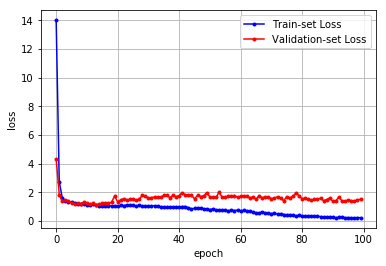

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 13s - loss: 14.9632 - acc: 0.4889 - val_loss: 4.9805 - val_acc: 0.5527
Epoch 2/100
 - 4s - loss: 2.9836 - acc: 0.5837 - val_loss: 2.0335 - val_acc: 0.5243
Epoch 3/100
 - 4s - loss: 1.6810 - acc: 0.6070 - val_loss: 1.6123 - val_acc: 0.6023
Epoch 4/100
 - 4s - loss: 1.5012 - acc: 0.6309 - val_loss: 1.4034 - val_acc: 0.6367
Epoch 5/100
 - 4s - loss: 1.3360 - acc: 0.6436 - val_loss: 2.0700 - val_acc: 0.4970
Epoch 6/100
 - 4s - loss: 1.4879 - acc: 0.6571 - val_loss: 1.3423 - val_acc: 0.5937
Epoch 7/100
 - 4s - loss: 1.3896 - acc: 0.6608 - val_loss: 1.3371 - val_acc: 0.6327
Epoch 8/100
 - 4s - loss: 1.3130 - acc: 0.6834 - val_loss: 1.2445 - val_acc: 0.6777
Epoch 9/100
 - 4s - loss: 1.3710 - acc: 0.6860 - val_loss: 1.2615 - val_acc: 0.6543
Epoch 10/100
 - 4s - loss: 1.3035 - acc: 0.7000 - val_loss: 1.2766 - val_acc: 0.6440
Epoch 11/100
 - 4s - loss: 1.1939 - acc: 0.7099 - val_loss: 1.2765 - val_acc: 0.6750
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.2360 - acc: 0.9744 - val_loss: 1.4362 - val_acc: 0.7210
Epoch 98/100
 - 4s - loss: 0.2199 - acc: 0.9728 - val_loss: 1.4158 - val_acc: 0.7130
Epoch 99/100
 - 4s - loss: 0.2171 - acc: 0.9769 - val_loss: 1.4194 - val_acc: 0.7230
Epoch 100/100
 - 4s - loss: 0.2152 - acc: 0.9756 - val_loss: 1.6099 - val_acc: 0.7080
3000/3000 [==============================] - 0s 161us/step

Test Accuracy: 0.7647


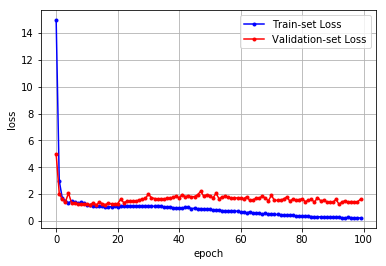

In [18]:
## ENSEMBLE MODELS
# Train many CNN models
for i in np.arange(no_estimators):
    # check point to save best model
    checkpoint = keras.callbacks.ModelCheckpoint('models_2/model_'+str(i)+'.h5', monitor='val_acc', \
            verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
    # clear GPU memory
    model = None
    K.clear_session()
    
    # train model
    model = create_cnn_model()
    history=model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), nb_epoch=100, \
                batch_size=64, verbose=2, callbacks=[checkpoint])
    print("\nTest Accuracy: {:.4f}".format(model.evaluate(X_test, Y_test)[1]))
    y_vloss=history.history['val_loss']
    y_loss=history.history['loss']
    
    x_len=numpy.arange(len(y_loss))
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [19]:
# Check individual scores - val_acc and get list of the best models
score_list = []
score_list2 = []
score_list3=[]
model = create_cnn_model()
for i in np.arange(no_estimators):    
    model.load_weights('models_2/model_'+str(i)+'.h5')
    scores3= model.evaluate(X_test, Y_test, verbose=0)
    scores2= model.evaluate(X_train, Y_train, verbose=0)
    scores = model.evaluate(X_validation, Y_validation, verbose=0)
    score_list.append(scores[1])   #validation Acc
    score_list2.append(scores2[1])    #Train Acc
    score_list3.append(scores3[1])  #Test Acc
score_list = np.array(score_list)
score_list2= np.array(score_list2)
score_list3= np.array(score_list3)
score_list_filter = score_list >= 0.72 # threshold to select best model
print("Train Acc: "+str(score_list2))
print("Validation Acc: "+ str(score_list))
print("Test Acc: "+ str(score_list3))

print(score_list_filter)

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train Acc: [0.99755556 0.99688889 0.99422222 0.99233333 0.997     ]
Validation Acc: [0.72833333 0.72066667 0.72733333 0.73833333 0.72866667]
Test Acc: [0.78266667 0.78433333 0.77133333 0.76933333 0.76266667]
[ True  True  True  True  True]


In [20]:
# Ensemble predictions ~ val_err 16%
predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
predictions_test=np.zeros((Y_test.shape[0],Y_test.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False:
        continue
    #validation
    model.load_weights('models_2/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_validation, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]
    #Test
    prediction_test = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot_test = np_utils.to_categorical(prediction_test, 10)
    predictions_test = predictions_test + prediction_onehot_test*score_list3[i]

predictions_label = np.argmax(predictions, axis=1)
evaluate = np.equal(predictions_label, Y_validation_label)

predictions_label_test = np.argmax(predictions_test, axis=1)
evaluate_test = np.equal(predictions_label_test, Y_test_label)

print("Ensemble Validation_Error: %.2f%%" % (100-np.mean(evaluate)*100))
print("Ensemble Validation_Accuracy: %.2f%%" % (np.mean(evaluate)*100))

print("Ensemble Test_Error: %.2f%%" % (100-np.mean(evaluate_test)*100))
print("Ensemble Test_Accuracy: %.2f%%" % (np.mean(evaluate_test)*100))

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Ensemble Validation_Error: 23.30%
Ensemble Validation_Accuracy: 76.70%
Ensemble Test_Error: 17.87%
Ensemble Test_Accuracy: 82.13%


In [21]:
## PERFORM PREDICTION ON TEST SET

X_test = X_test_label.astype('float32')

predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False: # skip bad model
        continue
    model.load_weights('models_2/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]

predictions_label = np.argmax(predictions, axis=1)
output = predictions_label.tolist()

with open('testlabel.pickle','wb') as f:
    pickle.dump(output, f)

pred = model.evaluate(X_test, Y_test)
print("test loss: ",pred[0]+"test acc: ",pred[1])

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

3000/3000 [==============================] - 1s 337us/step


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')